Import important libraries

In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from PIL import Image
from google.colab import files

Load RetinaNet pretrained on COCO dataset

In [2]:
model = hub.load("https://tfhub.dev/tensorflow/retinanet/resnet50_v1_fpn_640x640/1")

Upload images

In [3]:
uploaded = files.upload()
image_paths = list(uploaded.keys())
print("Uploaded files:", image_paths)


Saving 2.jpg to 2 (10).jpg
Saving 3.jpg to 3 (4).jpg
Uploaded files: ['2 (10).jpg', '3 (4).jpg']


Preprocess for RetinaNet and Extract predictions


Processing: 2 (10).jpg


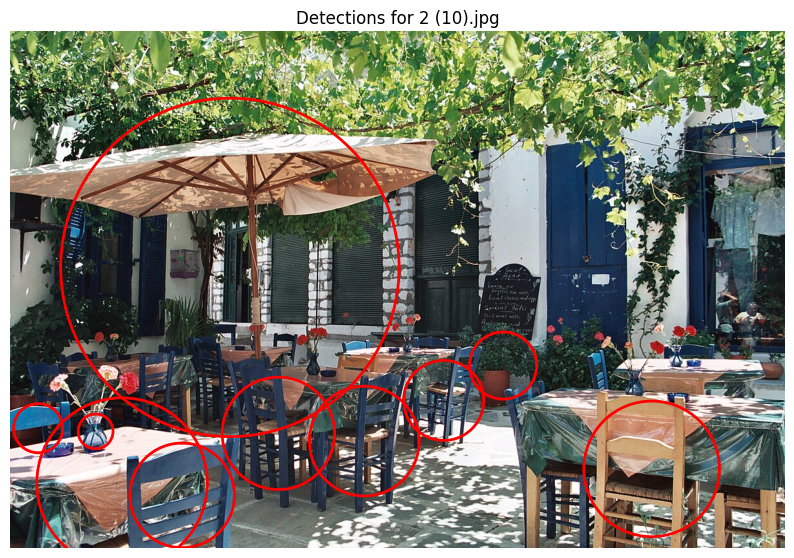

Top-5 Detections:
Class ID: 62, Score: 0.61, Box: [0.63791776 0.29406694 0.91846395 0.39805284]
Class ID: 62, Score: 0.59, Box: [0.6943163 0.7528138 1.        0.902244 ]
Class ID: 62, Score: 0.58, Box: [0.6583165  0.40474743 0.92851675 0.50967026]
Class ID: 62, Score: 0.56, Box: [0.6153491  0.5214513  0.81388706 0.5970103 ]
Class ID: 67, Score: 0.55, Box: [0.7574953  0.00105907 0.9906559  0.28823858]

Processing: 3 (4).jpg


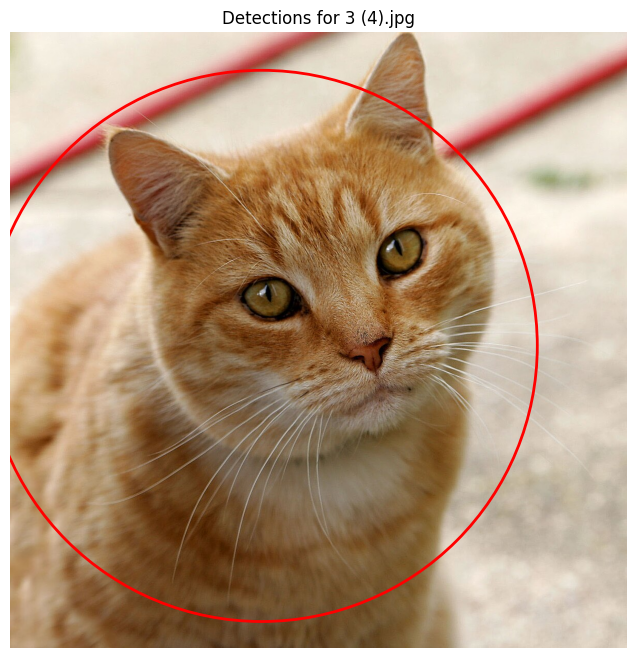

Top-5 Detections:
Class ID: 17, Score: 0.68, Box: [0.0194416  0.00316921 1.         0.81292903]
Class ID: 81, Score: 0.36, Box: [0.00913736 0.00989449 0.9995278  0.85521924]
Class ID: 73, Score: 0.22, Box: [0.00913736 0.00989449 0.9995278  0.85521924]
Class ID: 70, Score: 0.17, Box: [0.00703084 0.01734272 1.         0.8639988 ]
Class ID: 65, Score: 0.16, Box: [1.06185675e-04 4.44078445e-03 9.95721221e-01 8.46703887e-01]


In [4]:
for image_path in image_paths:
    print("\nProcessing:", image_path)

    # Open image and ensure 3 channels (RGB)
    image = Image.open(image_path).convert("RGB")
    img_array = np.array(image)

    # Preprocess for RetinaNet
    img_tensor = tf.convert_to_tensor(img_array, dtype=tf.uint8)[tf.newaxis, ...]

    # Run RetinaNet model
    outputs = model(img_tensor)

    # Extract predictions
    boxes = outputs["detection_boxes"].numpy()[0]
    classes = outputs["detection_classes"].numpy()[0].astype(int)
    scores = outputs["detection_scores"].numpy()[0]

    # Show image with detections
    fig, ax = plt.subplots(1, figsize=(10, 8))
    ax.imshow(img_array)

    h, w, _ = img_array.shape
    for i in range(len(scores)):
        if scores[i] > 0.5:  # Confidence threshold
            ymin, xmin, ymax, xmax = boxes[i]
            # Convert to pixel coordinates
            x_center = int((xmin + xmax) / 2 * w)
            y_center = int((ymin + ymax) / 2 * h)
            radius = int(((xmax - xmin) * w + (ymax - ymin) * h) / 4)

            circle = Circle((x_center, y_center), radius, fill=False, color="red", linewidth=2)
            ax.add_patch(circle)

    plt.title(f"Detections for {image_path}")
    plt.axis("off")
    plt.show()

    # Print top-5 detections
    print("Top-5 Detections:")
    for i in range(min(5, len(scores))):
        print(f"Class ID: {classes[i]}, Score: {scores[i]:.2f}, Box: {boxes[i]}")